<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/Standard_banner.png' align='right' width='100%'/>

<a href="../Index.ipynb" target="_blank"><< Index</a>
<br>
<a href="./1_1a_OLCI_data_access_Data_Store.ipynb" target="_blank"><< Accessing OLCI data</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="./1_3_OLCI_coverage.ipynb" target="_blank">Determining OLCI product coverage >></a>

<font color="#138D75">**Copernicus Marine Training Service**</font> <br>
**Copyright:** 2024 EUMETSAT <br>
**License:** MIT <br>
**Authors:** Ben Loveday (EUMETSAT/Innoflair UG), Hayley Evers-King (EUMETSAT)

<html>
    <div style="float:left"><a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/sensors/learn-olci"><img src="https://img.shields.io/badge/open-EUMETLAB-E67E22.svg?style=flat&logo=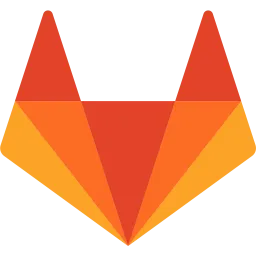" alt="Open in EUMETLAB"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
  <div style="width:100%">
    <div style="float:left"><a href="https://user.eumetsat.int/search-view?term=learn%20olci&sort=score%20desc&facets=%7B%22contentTypes%22:%5B%22Resources%7CSoftware%20%26%20code%22%5D,%22org-satellite-sensor%22:%5B%22EUMETSAT%7CSentinel-3%7COLCI%22%5D,%22theme%22:%5B%22Marine%22,%22Marine%7CMaritime%20safety%22,%22Marine%7COcean%20biogeochemistry%22,%22Marine%7COcean%20dynamics%22,%22Marine%7CWater%20quality%22%5D%7D"><img src="https://img.shields.io/badge/open-USER PORTAL-154360.svg?style=flat&logo=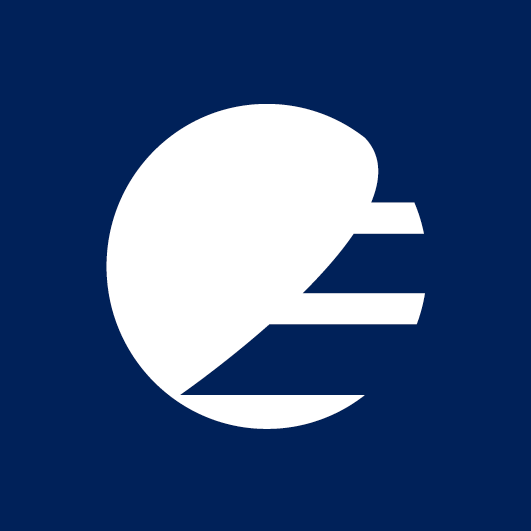" alt="Open in user portal"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
  <div style="width:100%">
    <div style="float:left"><a href="https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.eumetsat.int%2Feumetlab%2Foceans%2Focean-training%2Fsensors%2Flearn-olci/HEAD?urlpath=%2Ftree%2F1_OLCI_introductory%2F1_2_OLCI_file_structure.ipynb"><img src="https://mybinder.org/badge_logo.svg" alt="Launch on Binder"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
  <div style="width:100%">
    <div style="float:left"><a href="https://jupyterhub.prod.wekeo2.eu/hub/user-redirect/lab/tree/public/wekeo4oceans/learn-olci/1_OLCI_introductory/1_2_OLCI_file_structure.ipynb"><img src="https://img.shields.io/badge/launch-WEKEO-1a4696.svg?style=flat&logo=" alt="Launch on WEkEO"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div> 
</html>

<div class="alert alert-block alert-success">
<h3>Learn OLCI: Introductory</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>
    
The following modules are prerequisites for this notebook, and will retrieve the data required here.
  - **<a href="./1_1a_OLCI_data_access_Data_Store.ipynb" target="_blank">1_1a_OLCI_data_access_Data_Store.ipynb</a>** if using the Data Store for data access
    <br><br>**OR**<br><br>
  - **<a href="./1_1b_OLCI_data_access_HDA.ipynb" target="_blank">1_1b_OLCI_data_access_HDA.ipynb</a>** if using WEkEO for data access
    
</div>
<hr>

# 1.2 Understanding OLCI product structure

### Data used

| Dataset | EUMETSAT collection ID| EUMETSAT collection<br>description | WEkEO dataset ID | WEkEO description |
|:--------------------:|:-----------------------:|:-------------:|:-----------------:|:-----------------:|
| Sentinel-3 OLCI level 2 full resolution | EO:EUM:DAT:0407 | <a href="https://user.eumetsat.int/catalogue/EO:EUM:DAT:SENTINEL-3:OL_2_WFR___NTC" target="_blank">Description</a> | EO:EUM:DAT:SENTINEL-3:OL_2_WFR___ | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AEUM%3ADAT%3ASENTINEL-3%3AOL_2_WFR___" target="_blank">Description</a> |
| Sentinel-3 OLCI level 1b full resolution | EO:EUM:DAT:0409 | <a href="https://user.eumetsat.int/catalogue/EO:EUM:DAT:SENTINEL-3:OL_1_EFR___NTC" target="_blank">Description</a> | EO:EUM:DAT:SENTINEL-3:OL_1_EFR___ | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AEUM%3ADAT%3ASENTINEL-3%3AOL_1_EFR___" target="_blank">Description</a> |

### Learning outcomes

At the end of this notebook you will know;
* What the SAFE format is
* What components are inside a SAFE format file from OLCI
* What variables are in present in each component for OLCI data files (level-1B and level-2)

### Outline

Data from all the Sentinel satellites operated under the European Commissions Copernicus Programme are delievered in "**SAFE format**". The Sentinel-SAFE format is a specific variation of the Standard Archive Format for Europe (SAFE) format specification designed for the Sentinel satellite products.  It is based on the XML Formatted Data Units (XFDU) standard under development by the Consultative Committee for Space Data Systems (CCSDS). Sentinel-SAFE is a profile of XFDU, and it restricts the XFDU specifications for specific utilisation in the Earth Observation domain, providing semantics in the same domain to improve interoperability between ground segment facilities.

Each product package includes:

* a manifest file containing a metadata section and a data object section (an xml file).

* measurement data files (NetCDF-4 format)

* annotation data files, if defined (NetCDF-4 format)

The product package can exist as a directory in a filesystem, zipped folder or tarball. You can find more information on the contents of OLCI products in the <a href="https://user.eumetsat.int/resources/user-guides/sentinel-3-olci-level-1-data-guide" target="_blank">Sentinel-3 OLCI level 1 data guide</a> and <a href="https://user.eumetsat.int/resources/user-guides/sentinel-3-ocean-colour-level-2-data-guide" target="_blank">Sentinel-3 ocean colour level 2 data guide
</a> on our <a href="https://user.eumetsat.int/dashboard" target="_blank">User Portal</a>. Similarly, you can learn more about the Sentinel-SAFE format and conventions in the <a href="https://user.eumetsat.int/resources/user-guides/sentinel-safe-format-guide" target="_blank">Sentinel SAFE format guide</a>.

<div class="alert alert-info" role="alert">

## <a id='TOC_TOP'></a>Contents

</div>
    
 1. [Querying OLCI file structure (Level-1B)](#section1)
 2. [Querying OLCI file structure (Level-2)](#section2)
 3. [Applying your knowledge](#section3)

<hr>

We begin by importing all of the libraries that we need to run this notebook. If you have built your python using the environment file provided in this repository, then you should have everything you need. For more information on building environment, please see the repository **<a href="../README.md" target="_blank">README</a>**.

In [1]:
# library imports
import os                                     # a library that allows us access to basic operating system commands
import glob                                   # a library that aids in searching for files
from IPython.display import display, Markdown # a library that helps us display HTML and markdown
import xarray as xr                           # a library that supports the use of multi-dimensional arrays in Python
import xml.etree.ElementTree as ET            # a library that helps us parse XML files
import warnings                               # a library that helps us manage warnings
warnings.filterwarnings('ignore')

<div class="alert alert-info" role="alert">

## <a id='section1'></a>1. Querying OLCI file structure (Level-1B)
[Back to top](#TOC_TOP)

</div>

First we will create a variable which holds the path for the file we are interested in, in this case the level-1B OLCI file that we downloaded in either <a href="./1_1a_OLCI_data_access_Data_Store.ipynb" target="_blank">1_1a_OLCI_data_access_Data_Store.ipynb</a> or <a href="./1_1b_OLCI_data_access_HDA.ipynb" target="_blank">1_1b_OLCI_data_access_HDA.ipynb</a>.

In [2]:
# selecting SAFE directory
SAFE_directory = os.path.join(os.getcwd(), 'products', 
    'S3A_OL_1_EFR____20210717T101015_20210717T101315_20210718T145224_0179_074_122_1980_MAR_O_NT_002.SEN3')

Next, we'll create another variable that takes this path, and finds and adds on the names of the manifest file within the SAFE folder. For Sentinel-3, this manifest is always called **xfdumanifest.xml** and contains very useful information about the nature of the contents of the SAFE format product.

In [3]:
# selecting SAFE manifest
SAFE_manifest = glob.glob(os.path.join(SAFE_directory, 'xfd*.xml'))[0]
display(Markdown('**Manifest file:** {}'.format(os.path.basename(SAFE_manifest))))

**Manifest file:** xfdumanifest.xml

Then, we'll read the manifest file in to a Python object format called a dictionary. This will make it easier for us to interact with the product in the next step.

In [4]:
# Reading SAFE manifest and outputting/collecting component names
tree = ET.parse(SAFE_manifest)
root = tree.getroot()
items = root.find('dataObjectSection')
SAFE_components = []
for item in items:
    display(Markdown("**File name:** {}".format(item[0][0].get('href'))))
    display(Markdown("*File info: {}*".format(item[0][0].get('textInfo'))))
    SAFE_components.append(os.path.join(SAFE_directory, item[0][0].get('href')))

**File name:** ./Oa01_radiance.nc

*File info: TOA radiance for OLCI acquisition band Oa01*

**File name:** ./Oa02_radiance.nc

*File info: TOA radiance for OLCI acquisition band Oa02*

**File name:** ./Oa03_radiance.nc

*File info: TOA radiance for OLCI acquisition band Oa03*

**File name:** ./Oa04_radiance.nc

*File info: TOA radiance for OLCI acquisition band Oa04*

**File name:** ./Oa05_radiance.nc

*File info: TOA radiance for OLCI acquisition band Oa05*

**File name:** ./Oa06_radiance.nc

*File info: TOA radiance for OLCI acquisition band Oa06*

**File name:** ./Oa07_radiance.nc

*File info: TOA radiance for OLCI acquisition band Oa07*

**File name:** ./Oa08_radiance.nc

*File info: TOA radiance for OLCI acquisition band Oa08*

**File name:** ./Oa09_radiance.nc

*File info: TOA radiance for OLCI acquisition band Oa09*

**File name:** ./Oa10_radiance.nc

*File info: TOA radiance for OLCI acquisition band Oa10*

**File name:** ./Oa11_radiance.nc

*File info: TOA radiance for OLCI acquisition band Oa11*

**File name:** ./Oa12_radiance.nc

*File info: TOA radiance for OLCI acquisition band Oa12*

**File name:** ./Oa13_radiance.nc

*File info: TOA radiance for OLCI acquisition band Oa13*

**File name:** ./Oa14_radiance.nc

*File info: TOA radiance for OLCI acquisition band Oa14*

**File name:** ./Oa15_radiance.nc

*File info: TOA radiance for OLCI acquisition band Oa15*

**File name:** ./Oa16_radiance.nc

*File info: TOA radiance for OLCI acquisition band Oa16*

**File name:** ./Oa17_radiance.nc

*File info: TOA radiance for OLCI acquisition band Oa17*

**File name:** ./Oa18_radiance.nc

*File info: TOA radiance for OLCI acquisition band Oa18*

**File name:** ./Oa19_radiance.nc

*File info: TOA radiance for OLCI acquisition band Oa19*

**File name:** ./Oa20_radiance.nc

*File info: TOA radiance for OLCI acquisition band Oa20*

**File name:** ./Oa21_radiance.nc

*File info: TOA radiance for OLCI acquisition band Oa21*

**File name:** ./geo_coordinates.nc

*File info: Geo Coordinates Annotations*

**File name:** ./instrument_data.nc

*File info: Instrument Annotation*

**File name:** ./qualityFlags.nc

*File info: Quality flags*

**File name:** ./removed_pixels.nc

*File info: Removed Pixels information used for SYN L1c reconstruction*

**File name:** ./tie_geo_coordinates.nc

*File info: Tie-Point Geo Coordinate Annotations*

**File name:** ./tie_geometries.nc

*File info: Tie-Point Geometries Annotations*

**File name:** ./tie_meteo.nc

*File info: Tie-Point Meteo Annotations*

**File name:** ./time_coordinates.nc

*File info: Time Coordinates Annotations*

The next section of code will display each of the components within the product. Scrolling through you can see the main groups of variables, including some you may already know or be interested in working with.

In [5]:
# Display component structure and variables
for SAFE_component in sorted(SAFE_components):
    ds = xr.open_dataset(SAFE_component)
    display(Markdown('**Filename:** {}'.format(os.path.basename(SAFE_component))))
    display(ds)
    ds.close()

**Filename:** Oa01_radiance.nc

<xarray.Dataset> Size: 80MB
Dimensions:        (rows: 4090, columns: 4865)
Dimensions without coordinates: rows, columns
Data variables:
    Oa01_radiance  (rows, columns) float32 80MB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T14:52:24Z
    ...                     ...
    references:             S3IPF PDS 004.1 - i2r4 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-1-EO 06.11
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 1b Product, Radiance Oa01 Data Set

**Filename:** Oa02_radiance.nc

<xarray.Dataset> Size: 80MB
Dimensions:        (rows: 4090, columns: 4865)
Dimensions without coordinates: rows, columns
Data variables:
    Oa02_radiance  (rows, columns) float32 80MB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T14:52:24Z
    ...                     ...
    references:             S3IPF PDS 004.1 - i2r4 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-1-EO 06.11
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 1b Product, Radiance Oa02 Data Set

**Filename:** Oa03_radiance.nc

<xarray.Dataset> Size: 80MB
Dimensions:        (rows: 4090, columns: 4865)
Dimensions without coordinates: rows, columns
Data variables:
    Oa03_radiance  (rows, columns) float32 80MB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T14:52:24Z
    ...                     ...
    references:             S3IPF PDS 004.1 - i2r4 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-1-EO 06.11
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 1b Product, Radiance Oa03 Data Set

**Filename:** Oa04_radiance.nc

<xarray.Dataset> Size: 80MB
Dimensions:        (rows: 4090, columns: 4865)
Dimensions without coordinates: rows, columns
Data variables:
    Oa04_radiance  (rows, columns) float32 80MB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T14:52:24Z
    ...                     ...
    references:             S3IPF PDS 004.1 - i2r4 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-1-EO 06.11
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 1b Product, Radiance Oa04 Data Set

**Filename:** Oa05_radiance.nc

<xarray.Dataset> Size: 80MB
Dimensions:        (rows: 4090, columns: 4865)
Dimensions without coordinates: rows, columns
Data variables:
    Oa05_radiance  (rows, columns) float32 80MB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T14:52:24Z
    ...                     ...
    references:             S3IPF PDS 004.1 - i2r4 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-1-EO 06.11
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 1b Product, Radiance Oa05 Data Set

**Filename:** Oa06_radiance.nc

<xarray.Dataset> Size: 80MB
Dimensions:        (rows: 4090, columns: 4865)
Dimensions without coordinates: rows, columns
Data variables:
    Oa06_radiance  (rows, columns) float32 80MB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T14:52:24Z
    ...                     ...
    references:             S3IPF PDS 004.1 - i2r4 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-1-EO 06.11
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 1b Product, Radiance Oa06 Data Set

**Filename:** Oa07_radiance.nc

<xarray.Dataset> Size: 80MB
Dimensions:        (rows: 4090, columns: 4865)
Dimensions without coordinates: rows, columns
Data variables:
    Oa07_radiance  (rows, columns) float32 80MB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T14:52:24Z
    ...                     ...
    references:             S3IPF PDS 004.1 - i2r4 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-1-EO 06.11
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 1b Product, Radiance Oa07 Data Set

**Filename:** Oa08_radiance.nc

<xarray.Dataset> Size: 80MB
Dimensions:        (rows: 4090, columns: 4865)
Dimensions without coordinates: rows, columns
Data variables:
    Oa08_radiance  (rows, columns) float32 80MB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T14:52:24Z
    ...                     ...
    references:             S3IPF PDS 004.1 - i2r4 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-1-EO 06.11
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 1b Product, Radiance Oa08 Data Set

**Filename:** Oa09_radiance.nc

<xarray.Dataset> Size: 80MB
Dimensions:        (rows: 4090, columns: 4865)
Dimensions without coordinates: rows, columns
Data variables:
    Oa09_radiance  (rows, columns) float32 80MB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T14:52:24Z
    ...                     ...
    references:             S3IPF PDS 004.1 - i2r4 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-1-EO 06.11
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 1b Product, Radiance Oa09 Data Set

**Filename:** Oa10_radiance.nc

<xarray.Dataset> Size: 80MB
Dimensions:        (rows: 4090, columns: 4865)
Dimensions without coordinates: rows, columns
Data variables:
    Oa10_radiance  (rows, columns) float32 80MB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T14:52:24Z
    ...                     ...
    references:             S3IPF PDS 004.1 - i2r4 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-1-EO 06.11
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 1b Product, Radiance Oa10 Data Set

**Filename:** Oa11_radiance.nc

<xarray.Dataset> Size: 80MB
Dimensions:        (rows: 4090, columns: 4865)
Dimensions without coordinates: rows, columns
Data variables:
    Oa11_radiance  (rows, columns) float32 80MB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T14:52:24Z
    ...                     ...
    references:             S3IPF PDS 004.1 - i2r4 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-1-EO 06.11
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 1b Product, Radiance Oa11 Data Set

**Filename:** Oa12_radiance.nc

<xarray.Dataset> Size: 80MB
Dimensions:        (rows: 4090, columns: 4865)
Dimensions without coordinates: rows, columns
Data variables:
    Oa12_radiance  (rows, columns) float32 80MB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T14:52:24Z
    ...                     ...
    references:             S3IPF PDS 004.1 - i2r4 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-1-EO 06.11
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 1b Product, Radiance Oa12 Data Set

**Filename:** Oa13_radiance.nc

<xarray.Dataset> Size: 80MB
Dimensions:        (rows: 4090, columns: 4865)
Dimensions without coordinates: rows, columns
Data variables:
    Oa13_radiance  (rows, columns) float32 80MB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T14:52:24Z
    ...                     ...
    references:             S3IPF PDS 004.1 - i2r4 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-1-EO 06.11
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 1b Product, Radiance Oa13 Data Set

**Filename:** Oa14_radiance.nc

<xarray.Dataset> Size: 80MB
Dimensions:        (rows: 4090, columns: 4865)
Dimensions without coordinates: rows, columns
Data variables:
    Oa14_radiance  (rows, columns) float32 80MB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T14:52:24Z
    ...                     ...
    references:             S3IPF PDS 004.1 - i2r4 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-1-EO 06.11
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 1b Product, Radiance Oa14 Data Set

**Filename:** Oa15_radiance.nc

<xarray.Dataset> Size: 80MB
Dimensions:        (rows: 4090, columns: 4865)
Dimensions without coordinates: rows, columns
Data variables:
    Oa15_radiance  (rows, columns) float32 80MB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T14:52:24Z
    ...                     ...
    references:             S3IPF PDS 004.1 - i2r4 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-1-EO 06.11
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 1b Product, Radiance Oa15 Data Set

**Filename:** Oa16_radiance.nc

<xarray.Dataset> Size: 80MB
Dimensions:        (rows: 4090, columns: 4865)
Dimensions without coordinates: rows, columns
Data variables:
    Oa16_radiance  (rows, columns) float32 80MB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T14:52:24Z
    ...                     ...
    references:             S3IPF PDS 004.1 - i2r4 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-1-EO 06.11
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 1b Product, Radiance Oa16 Data Set

**Filename:** Oa17_radiance.nc

<xarray.Dataset> Size: 80MB
Dimensions:        (rows: 4090, columns: 4865)
Dimensions without coordinates: rows, columns
Data variables:
    Oa17_radiance  (rows, columns) float32 80MB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T14:52:24Z
    ...                     ...
    references:             S3IPF PDS 004.1 - i2r4 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-1-EO 06.11
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 1b Product, Radiance Oa17 Data Set

**Filename:** Oa18_radiance.nc

<xarray.Dataset> Size: 80MB
Dimensions:        (rows: 4090, columns: 4865)
Dimensions without coordinates: rows, columns
Data variables:
    Oa18_radiance  (rows, columns) float32 80MB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T14:52:24Z
    ...                     ...
    references:             S3IPF PDS 004.1 - i2r4 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-1-EO 06.11
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 1b Product, Radiance Oa18 Data Set

**Filename:** Oa19_radiance.nc

<xarray.Dataset> Size: 80MB
Dimensions:        (rows: 4090, columns: 4865)
Dimensions without coordinates: rows, columns
Data variables:
    Oa19_radiance  (rows, columns) float32 80MB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T14:52:24Z
    ...                     ...
    references:             S3IPF PDS 004.1 - i2r4 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-1-EO 06.11
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 1b Product, Radiance Oa19 Data Set

**Filename:** Oa20_radiance.nc

<xarray.Dataset> Size: 80MB
Dimensions:        (rows: 4090, columns: 4865)
Dimensions without coordinates: rows, columns
Data variables:
    Oa20_radiance  (rows, columns) float32 80MB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T14:52:24Z
    ...                     ...
    references:             S3IPF PDS 004.1 - i2r4 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-1-EO 06.11
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 1b Product, Radiance Oa20 Data Set

**Filename:** Oa21_radiance.nc

<xarray.Dataset> Size: 80MB
Dimensions:        (rows: 4090, columns: 4865)
Dimensions without coordinates: rows, columns
Data variables:
    Oa21_radiance  (rows, columns) float32 80MB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T14:52:24Z
    ...                     ...
    references:             S3IPF PDS 004.1 - i2r4 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-1-EO 06.11
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 1b Product, Radiance Oa21 Data Set

**Filename:** geo_coordinates.nc

<xarray.Dataset> Size: 398MB
Dimensions:    (rows: 4090, columns: 4865)
Dimensions without coordinates: rows, columns
Data variables:
    altitude   (rows, columns) float32 80MB ...
    latitude   (rows, columns) float64 159MB ...
    longitude  (rows, columns) float64 159MB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T14:52:24Z
    ...                     ...
    references:             S3IPF PDS 004.1 - i2r4 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-1-EO 06.11
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 1b Product, Geo Coordinates Data Set

**Filename:** instrument_data.nc

<xarray.Dataset> Size: 81MB
Dimensions:                       (bands: 21, detectors: 3700, rows: 4090,
                                   columns: 4865)
Dimensions without coordinates: bands, detectors, rows, columns
Data variables:
    FWHM                          (bands, detectors) float32 311kB ...
    detector_index                (rows, columns) float32 80MB ...
    frame_offset                  (detectors) float32 15kB ...
    lambda0                       (bands, detectors) float32 311kB ...
    relative_spectral_covariance  (bands, bands) float32 2kB ...
    solar_flux                    (bands, detectors) float32 311kB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T14:52:24Z
    ...                     ...
    references:             S3IPF PDS 004.1 - i2r4 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-1-EO 06.11
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 1b Product, Instrument Data Set

**Filename:** qualityFlags.nc

<xarray.Dataset> Size: 80MB
Dimensions:        (rows: 4090, columns: 4865)
Dimensions without coordinates: rows, columns
Data variables:
    quality_flags  (rows, columns) uint32 80MB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T14:52:24Z
    ...                     ...
    references:             S3IPF PDS 004.1 - i2r4 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-1-EO 06.11
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 1b Product, Classification and Quality...

**Filename:** removed_pixels.nc

<xarray.Dataset> Size: 66MB
Dimensions:            (rows: 4090, removed_pixels: 135)
Coordinates:
    altitude           (rows, removed_pixels) float32 2MB ...
    latitude           (rows, removed_pixels) float64 4MB ...
    longitude          (rows, removed_pixels) float64 4MB ...
Dimensions without coordinates: rows, removed_pixels
Data variables: (12/25)
    Oa01_radiance      (rows, removed_pixels) float32 2MB ...
    Oa02_radiance      (rows, removed_pixels) float32 2MB ...
    Oa03_radiance      (rows, removed_pixels) float32 2MB ...
    Oa04_radiance      (rows, removed_pixels) float32 2MB ...
    Oa05_radiance      (rows, removed_pixels) float32 2MB ...
    Oa06_radiance      (rows, removed_pixels) float32 2MB ...
    ...                 ...
    Oa20_radiance      (rows, removed_pixels) float32 2MB ...
    Oa21_radiance      (rows, removed_pixels) float32 2MB ...
    SZA                (rows, removed_pixels) float64 4MB ...
    detector_index     (rows, removed_pixels) float32 2MB ...
    nb_removed_pixels  (rows) uint16 8kB ...
    quality_flags      (rows, removed_pixels) uint32 2MB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T14:52:24Z
    ...                     ...
    references:             S3IPF PDS 004.1 - i2r4 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-1-EO 06.11
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 1b Product, Removed Pixels Data Set

**Filename:** tie_geo_coordinates.nc

<xarray.Dataset> Size: 5MB
Dimensions:    (tie_rows: 4090, tie_columns: 77)
Dimensions without coordinates: tie_rows, tie_columns
Data variables:
    latitude   (tie_rows, tie_columns) float64 3MB ...
    longitude  (tie_rows, tie_columns) float64 3MB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T14:52:24Z
    ...                     ...
    references:             S3IPF PDS 004.1 - i2r4 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-1-EO 06.11
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 1b Product, Tie-Point Geo Coordinates ...

**Filename:** tie_geometries.nc

<xarray.Dataset> Size: 10MB
Dimensions:  (tie_rows: 4090, tie_columns: 77)
Dimensions without coordinates: tie_rows, tie_columns
Data variables:
    OAA      (tie_rows, tie_columns) float64 3MB ...
    OZA      (tie_rows, tie_columns) float64 3MB ...
    SAA      (tie_rows, tie_columns) float64 3MB ...
    SZA      (tie_rows, tie_columns) float64 3MB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T14:52:24Z
    ...                     ...
    references:             S3IPF PDS 004.1 - i2r4 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-1-EO 06.11
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 1b Product, Tie-Point Geometries Data Set

**Filename:** tie_meteo.nc

<xarray.Dataset> Size: 39MB
Dimensions:                          (tie_rows: 4090, tie_columns: 77,
                                      tie_pressure_levels: 25, wind_vectors: 2)
Dimensions without coordinates: tie_rows, tie_columns, tie_pressure_levels,
                                wind_vectors
Data variables:
    atmospheric_temperature_profile  (tie_rows, tie_columns, tie_pressure_levels) float32 31MB ...
    horizontal_wind                  (tie_rows, tie_columns, wind_vectors) float32 3MB ...
    humidity                         (tie_rows, tie_columns) float32 1MB ...
    reference_pressure_level         (tie_pressure_levels) float32 100B ...
    sea_level_pressure               (tie_rows, tie_columns) float32 1MB ...
    total_columnar_water_vapour      (tie_rows, tie_columns) float32 1MB ...
    total_ozone                      (tie_rows, tie_columns) float32 1MB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T14:52:24Z
    ...                     ...
    references:             S3IPF PDS 004.1 - i2r4 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-1-EO 06.11
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 1b Product, Tie-Point Meteo Data Set

**Filename:** time_coordinates.nc

<xarray.Dataset> Size: 33kB
Dimensions:     (rows: 4090)
Dimensions without coordinates: rows
Data variables:
    time_stamp  (rows) datetime64[ns] 33kB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T14:52:24Z
    ...                     ...
    references:             S3IPF PDS 004.1 - i2r4 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-1-EO 06.11
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 1b Product, Time Stamps Data Set

<div class="alert alert-info" role="alert">

## <a id='section2'></a>2. Querying OLCI file structure (Level-2)
[Back to top](#TOC_TOP)

</div>

Now let's look at the level-2 OLCI product that we downloaded.

In [6]:
# selecting SAFE directory
SAFE_directory = os.path.join(os.getcwd(), 'products', 
    'S3A_OL_2_WFR____20210717T101015_20210717T101315_20210718T221347_0179_074_122_1980_MAR_O_NT_003.SEN3')

Again, we'll create another variable that takes this path, and finds and adds on the names of the manifest file within the SAFE folder.  

In [7]:
# selecting SAFE manifest
SAFE_manifest = glob.glob(os.path.join(SAFE_directory, 'xfd*.xml'))[0]
display(Markdown('**Manifest file:** {}'.format(os.path.basename(SAFE_manifest))))

**Manifest file:** xfdumanifest.xml

Then, we'll read the manifest file for this level-2 data product in to another dictionary. 

In [8]:
# Reading SAFE manifest and outputting/collecting component names
tree = ET.parse(SAFE_manifest)
root = tree.getroot()
items = root.find('dataObjectSection')
SAFE_components = []
for item in items:
    display(Markdown("**File name:** {}".format(item[0][0].get('href'))))
    display(Markdown("*File info: {}*".format(item[0][0].get('textInfo'))))
    SAFE_components.append(os.path.join(SAFE_directory, item[0][0].get('href')))

**File name:** ./Oa01_reflectance.nc

*File info: Reflectance for OLCI acquisition band Oa01*

**File name:** ./Oa02_reflectance.nc

*File info: Reflectance for OLCI acquisition band Oa02*

**File name:** ./Oa03_reflectance.nc

*File info: Reflectance for OLCI acquisition band Oa03*

**File name:** ./Oa04_reflectance.nc

*File info: Reflectance for OLCI acquisition band Oa04*

**File name:** ./Oa05_reflectance.nc

*File info: Reflectance for OLCI acquisition band Oa05*

**File name:** ./Oa06_reflectance.nc

*File info: Reflectance for OLCI acquisition band Oa06*

**File name:** ./Oa07_reflectance.nc

*File info: Reflectance for OLCI acquisition band Oa07*

**File name:** ./Oa08_reflectance.nc

*File info: Reflectance for OLCI acquisition band Oa08*

**File name:** ./Oa09_reflectance.nc

*File info: Reflectance for OLCI acquisition band Oa09*

**File name:** ./Oa10_reflectance.nc

*File info: Reflectance for OLCI acquisition band Oa10*

**File name:** ./Oa11_reflectance.nc

*File info: Reflectance for OLCI acquisition band Oa11*

**File name:** ./Oa12_reflectance.nc

*File info: Reflectance for OLCI acquisition band Oa12*

**File name:** ./Oa16_reflectance.nc

*File info: Reflectance for OLCI acquisition band Oa16*

**File name:** ./Oa17_reflectance.nc

*File info: Reflectance for OLCI acquisition band Oa17*

**File name:** ./Oa18_reflectance.nc

*File info: Reflectance for OLCI acquisition band Oa18*

**File name:** ./Oa21_reflectance.nc

*File info: Reflectance for OLCI acquisition band Oa21*

**File name:** ./chl_nn.nc

*File info: Neural Net Chlorophyll concentration*

**File name:** ./chl_oc4me.nc

*File info: OC4Me algorithm Chlorophyll concentration*

**File name:** ./geo_coordinates.nc

*File info: Geo Coordinates Annotations*

**File name:** ./instrument_data.nc

*File info: Instrument Annotation*

**File name:** ./iop_nn.nc

*File info: Inherent Optical Properties of water*

**File name:** ./iwv.nc

*File info: Integrated water vapour column*

**File name:** ./par.nc

*File info: Photosynthetically Active Radiation*

**File name:** ./tie_geo_coordinates.nc

*File info: Tie-Point Geo Coordinate Annotations*

**File name:** ./tie_geometries.nc

*File info: Tie-Point Geometries Annotations*

**File name:** ./tie_meteo.nc

*File info: Tie-Point Meteo Annotations*

**File name:** ./time_coordinates.nc

*File info: Time Coordinates Annotations*

**File name:** ./trsp.nc

*File info: Transparency properties of water*

**File name:** ./tsm_nn.nc

*File info: Total suspended matter concentration*

**File name:** ./w_aer.nc

*File info: Aerosol Over Water*

**File name:** ./wqsf.nc

*File info: Water Quality and Science Flags*

Finally, let's display the components of the product...

In [9]:
# Display component structure and variables
for SAFE_component in sorted(SAFE_components):
    ds = xr.open_dataset(SAFE_component)
    display(Markdown('**Filename:** {}'.format(os.path.basename(SAFE_component))))
    display(ds)
    ds.close()

**Filename:** Oa01_reflectance.nc

<xarray.Dataset> Size: 159MB
Dimensions:               (rows: 4090, columns: 4865)
Dimensions without coordinates: rows, columns
Data variables:
    Oa01_reflectance      (rows, columns) float32 80MB ...
    Oa01_reflectance_err  (rows, columns) float32 80MB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T22:13:47Z
    ...                     ...
    references:             S3IPF PDS 004.3 - i2r3 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-2 07.01
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 2 WATER Product, Reflectance Oa01 Data...

**Filename:** Oa02_reflectance.nc

<xarray.Dataset> Size: 159MB
Dimensions:               (rows: 4090, columns: 4865)
Dimensions without coordinates: rows, columns
Data variables:
    Oa02_reflectance      (rows, columns) float32 80MB ...
    Oa02_reflectance_err  (rows, columns) float32 80MB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T22:13:47Z
    ...                     ...
    references:             S3IPF PDS 004.3 - i2r3 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-2 07.01
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 2 WATER Product, Reflectance Oa02 Data...

**Filename:** Oa03_reflectance.nc

<xarray.Dataset> Size: 159MB
Dimensions:               (rows: 4090, columns: 4865)
Dimensions without coordinates: rows, columns
Data variables:
    Oa03_reflectance      (rows, columns) float32 80MB ...
    Oa03_reflectance_err  (rows, columns) float32 80MB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T22:13:47Z
    ...                     ...
    references:             S3IPF PDS 004.3 - i2r3 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-2 07.01
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 2 WATER Product, Reflectance Oa03 Data...

**Filename:** Oa04_reflectance.nc

<xarray.Dataset> Size: 159MB
Dimensions:               (rows: 4090, columns: 4865)
Dimensions without coordinates: rows, columns
Data variables:
    Oa04_reflectance      (rows, columns) float32 80MB ...
    Oa04_reflectance_err  (rows, columns) float32 80MB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T22:13:47Z
    ...                     ...
    references:             S3IPF PDS 004.3 - i2r3 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-2 07.01
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 2 WATER Product, Reflectance Oa04 Data...

**Filename:** Oa05_reflectance.nc

<xarray.Dataset> Size: 159MB
Dimensions:               (rows: 4090, columns: 4865)
Dimensions without coordinates: rows, columns
Data variables:
    Oa05_reflectance      (rows, columns) float32 80MB ...
    Oa05_reflectance_err  (rows, columns) float32 80MB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T22:13:47Z
    ...                     ...
    references:             S3IPF PDS 004.3 - i2r3 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-2 07.01
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 2 WATER Product, Reflectance Oa05 Data...

**Filename:** Oa06_reflectance.nc

<xarray.Dataset> Size: 159MB
Dimensions:               (rows: 4090, columns: 4865)
Dimensions without coordinates: rows, columns
Data variables:
    Oa06_reflectance      (rows, columns) float32 80MB ...
    Oa06_reflectance_err  (rows, columns) float32 80MB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T22:13:47Z
    ...                     ...
    references:             S3IPF PDS 004.3 - i2r3 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-2 07.01
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 2 WATER Product, Reflectance Oa06 Data...

**Filename:** Oa07_reflectance.nc

<xarray.Dataset> Size: 159MB
Dimensions:               (rows: 4090, columns: 4865)
Dimensions without coordinates: rows, columns
Data variables:
    Oa07_reflectance      (rows, columns) float32 80MB ...
    Oa07_reflectance_err  (rows, columns) float32 80MB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T22:13:47Z
    ...                     ...
    references:             S3IPF PDS 004.3 - i2r3 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-2 07.01
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 2 WATER Product, Reflectance Oa07 Data...

**Filename:** Oa08_reflectance.nc

<xarray.Dataset> Size: 159MB
Dimensions:               (rows: 4090, columns: 4865)
Dimensions without coordinates: rows, columns
Data variables:
    Oa08_reflectance      (rows, columns) float32 80MB ...
    Oa08_reflectance_err  (rows, columns) float32 80MB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T22:13:47Z
    ...                     ...
    references:             S3IPF PDS 004.3 - i2r3 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-2 07.01
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 2 WATER Product, Reflectance Oa08 Data...

**Filename:** Oa09_reflectance.nc

<xarray.Dataset> Size: 159MB
Dimensions:               (rows: 4090, columns: 4865)
Dimensions without coordinates: rows, columns
Data variables:
    Oa09_reflectance      (rows, columns) float32 80MB ...
    Oa09_reflectance_err  (rows, columns) float32 80MB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T22:13:47Z
    ...                     ...
    references:             S3IPF PDS 004.3 - i2r3 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-2 07.01
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 2 WATER Product, Reflectance Oa09 Data...

**Filename:** Oa10_reflectance.nc

<xarray.Dataset> Size: 159MB
Dimensions:               (rows: 4090, columns: 4865)
Dimensions without coordinates: rows, columns
Data variables:
    Oa10_reflectance      (rows, columns) float32 80MB ...
    Oa10_reflectance_err  (rows, columns) float32 80MB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T22:13:47Z
    ...                     ...
    references:             S3IPF PDS 004.3 - i2r3 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-2 07.01
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 2 WATER Product, Reflectance Oa10 Data...

**Filename:** Oa11_reflectance.nc

<xarray.Dataset> Size: 159MB
Dimensions:               (rows: 4090, columns: 4865)
Dimensions without coordinates: rows, columns
Data variables:
    Oa11_reflectance      (rows, columns) float32 80MB ...
    Oa11_reflectance_err  (rows, columns) float32 80MB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T22:13:47Z
    ...                     ...
    references:             S3IPF PDS 004.3 - i2r3 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-2 07.01
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 2 WATER Product, Reflectance Oa11 Data...

**Filename:** Oa12_reflectance.nc

<xarray.Dataset> Size: 159MB
Dimensions:               (rows: 4090, columns: 4865)
Dimensions without coordinates: rows, columns
Data variables:
    Oa12_reflectance      (rows, columns) float32 80MB ...
    Oa12_reflectance_err  (rows, columns) float32 80MB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T22:13:47Z
    ...                     ...
    references:             S3IPF PDS 004.3 - i2r3 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-2 07.01
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 2 WATER Product, Reflectance Oa12 Data...

**Filename:** Oa16_reflectance.nc

<xarray.Dataset> Size: 159MB
Dimensions:               (rows: 4090, columns: 4865)
Dimensions without coordinates: rows, columns
Data variables:
    Oa16_reflectance      (rows, columns) float32 80MB ...
    Oa16_reflectance_err  (rows, columns) float32 80MB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T22:13:47Z
    ...                     ...
    references:             S3IPF PDS 004.3 - i2r3 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-2 07.01
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 2 WATER Product, Reflectance Oa16 Data...

**Filename:** Oa17_reflectance.nc

<xarray.Dataset> Size: 159MB
Dimensions:               (rows: 4090, columns: 4865)
Dimensions without coordinates: rows, columns
Data variables:
    Oa17_reflectance      (rows, columns) float32 80MB ...
    Oa17_reflectance_err  (rows, columns) float32 80MB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T22:13:47Z
    ...                     ...
    references:             S3IPF PDS 004.3 - i2r3 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-2 07.01
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 2 WATER Product, Reflectance Oa17 Data...

**Filename:** Oa18_reflectance.nc

<xarray.Dataset> Size: 159MB
Dimensions:               (rows: 4090, columns: 4865)
Dimensions without coordinates: rows, columns
Data variables:
    Oa18_reflectance      (rows, columns) float32 80MB ...
    Oa18_reflectance_err  (rows, columns) float32 80MB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T22:13:47Z
    ...                     ...
    references:             S3IPF PDS 004.3 - i2r3 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-2 07.01
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 2 WATER Product, Reflectance Oa18 Data...

**Filename:** Oa21_reflectance.nc

<xarray.Dataset> Size: 159MB
Dimensions:               (rows: 4090, columns: 4865)
Dimensions without coordinates: rows, columns
Data variables:
    Oa21_reflectance      (rows, columns) float32 80MB ...
    Oa21_reflectance_err  (rows, columns) float32 80MB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T22:13:47Z
    ...                     ...
    references:             S3IPF PDS 004.3 - i2r3 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-2 07.01
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 2 WATER Product, Reflectance Oa21 Data...

**Filename:** chl_nn.nc

<xarray.Dataset> Size: 159MB
Dimensions:     (rows: 4090, columns: 4865)
Dimensions without coordinates: rows, columns
Data variables:
    CHL_NN      (rows, columns) float32 80MB ...
    CHL_NN_err  (rows, columns) float32 80MB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T22:13:47Z
    ...                     ...
    references:             S3IPF PDS 004.3 - i2r3 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-2 07.01
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 2 WATER Product, Neural Net Chlorophyl...

**Filename:** chl_oc4me.nc

<xarray.Dataset> Size: 159MB
Dimensions:        (rows: 4090, columns: 4865)
Dimensions without coordinates: rows, columns
Data variables:
    CHL_OC4ME      (rows, columns) float32 80MB ...
    CHL_OC4ME_err  (rows, columns) float32 80MB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T22:13:47Z
    ...                     ...
    references:             S3IPF PDS 004.3 - i2r3 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-2 07.01
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 2 WATER Product, OC4Me Chlorophyll con...

**Filename:** geo_coordinates.nc

<xarray.Dataset> Size: 398MB
Dimensions:    (rows: 4090, columns: 4865)
Dimensions without coordinates: rows, columns
Data variables:
    altitude   (rows, columns) float32 80MB ...
    latitude   (rows, columns) float64 159MB ...
    longitude  (rows, columns) float64 159MB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T22:13:47Z
    ...                     ...
    references:             S3IPF PDS 004.3 - i2r3 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-2 07.01
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 2 WATER Product, Geo Coordinates Data Set

**Filename:** instrument_data.nc

<xarray.Dataset> Size: 81MB
Dimensions:                       (bands: 21, detectors: 3700, rows: 4090,
                                   columns: 4865)
Dimensions without coordinates: bands, detectors, rows, columns
Data variables:
    FWHM                          (bands, detectors) float32 311kB ...
    detector_index                (rows, columns) float32 80MB ...
    frame_offset                  (detectors) float32 15kB ...
    lambda0                       (bands, detectors) float32 311kB ...
    relative_spectral_covariance  (bands, bands) float32 2kB ...
    solar_flux                    (bands, detectors) float32 311kB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T22:13:47Z
    ...                     ...
    references:             S3IPF PDS 004.3 - i2r3 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-2 07.01
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 2 WATER Product, Instrument Data Set

**Filename:** iop_nn.nc

<xarray.Dataset> Size: 159MB
Dimensions:        (rows: 4090, columns: 4865)
Dimensions without coordinates: rows, columns
Data variables:
    ADG443_NN      (rows, columns) float32 80MB ...
    ADG443_NN_err  (rows, columns) float32 80MB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T22:13:47Z
    ...                     ...
    references:             S3IPF PDS 004.3 - i2r3 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-2 07.01
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 2 WATER Product, Neural Net Inherent O...

**Filename:** iwv.nc

<xarray.Dataset> Size: 159MB
Dimensions:  (rows: 4090, columns: 4865)
Dimensions without coordinates: rows, columns
Data variables:
    IWV      (rows, columns) float32 80MB ...
    IWV_err  (rows, columns) float32 80MB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T22:13:47Z
    ...                     ...
    references:             S3IPF PDS 004.3 - i2r3 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-2 07.01
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 2 WATER Product, Integrated Water Vapo...

**Filename:** par.nc

<xarray.Dataset> Size: 159MB
Dimensions:  (rows: 4090, columns: 4865)
Dimensions without coordinates: rows, columns
Data variables:
    PAR      (rows, columns) float32 80MB ...
    PAR_err  (rows, columns) float32 80MB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T22:13:47Z
    ...                     ...
    references:             S3IPF PDS 004.3 - i2r3 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-2 07.01
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 2 WATER Product, Photosynthetically Ac...

**Filename:** tie_geo_coordinates.nc

<xarray.Dataset> Size: 5MB
Dimensions:    (tie_rows: 4090, tie_columns: 77)
Dimensions without coordinates: tie_rows, tie_columns
Data variables:
    latitude   (tie_rows, tie_columns) float64 3MB ...
    longitude  (tie_rows, tie_columns) float64 3MB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T22:13:47Z
    ...                     ...
    references:             S3IPF PDS 004.3 - i2r3 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-2 07.01
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 2 WATER Product, Tie-Point Geo Coordin...

**Filename:** tie_geometries.nc

<xarray.Dataset> Size: 10MB
Dimensions:  (tie_rows: 4090, tie_columns: 77)
Dimensions without coordinates: tie_rows, tie_columns
Data variables:
    OAA      (tie_rows, tie_columns) float64 3MB ...
    OZA      (tie_rows, tie_columns) float64 3MB ...
    SAA      (tie_rows, tie_columns) float64 3MB ...
    SZA      (tie_rows, tie_columns) float64 3MB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T22:13:47Z
    ...                     ...
    references:             S3IPF PDS 004.3 - i2r3 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-2 07.01
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 2 WATER Product, Tie-Point Geometries ...

**Filename:** tie_meteo.nc

<xarray.Dataset> Size: 39MB
Dimensions:                          (tie_rows: 4090, tie_columns: 77,
                                      tie_pressure_levels: 25, wind_vectors: 2)
Dimensions without coordinates: tie_rows, tie_columns, tie_pressure_levels,
                                wind_vectors
Data variables:
    atmospheric_temperature_profile  (tie_rows, tie_columns, tie_pressure_levels) float32 31MB ...
    horizontal_wind                  (tie_rows, tie_columns, wind_vectors) float32 3MB ...
    humidity                         (tie_rows, tie_columns) float32 1MB ...
    reference_pressure_level         (tie_pressure_levels) float32 100B ...
    sea_level_pressure               (tie_rows, tie_columns) float32 1MB ...
    total_columnar_water_vapour      (tie_rows, tie_columns) float32 1MB ...
    total_ozone                      (tie_rows, tie_columns) float32 1MB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T22:13:47Z
    ...                     ...
    references:             S3IPF PDS 004.3 - i2r3 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-2 07.01
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 2 WATER Product, Tie-Point Meteo Data Set

**Filename:** time_coordinates.nc

<xarray.Dataset> Size: 33kB
Dimensions:     (rows: 4090)
Dimensions without coordinates: rows
Data variables:
    time_stamp  (rows) datetime64[ns] 33kB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T22:13:47Z
    ...                     ...
    references:             S3IPF PDS 004.3 - i2r3 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-2 07.01
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 2 WATER Product, Time Stamps Data Set

**Filename:** trsp.nc

<xarray.Dataset> Size: 159MB
Dimensions:        (rows: 4090, columns: 4865)
Dimensions without coordinates: rows, columns
Data variables:
    KD490_M07      (rows, columns) float32 80MB ...
    KD490_M07_err  (rows, columns) float32 80MB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T22:13:47Z
    ...                     ...
    references:             S3IPF PDS 004.3 - i2r3 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-2 07.01
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 2 WATER Product, Transparency Data Set

**Filename:** tsm_nn.nc

<xarray.Dataset> Size: 159MB
Dimensions:     (rows: 4090, columns: 4865)
Dimensions without coordinates: rows, columns
Data variables:
    TSM_NN      (rows, columns) float32 80MB ...
    TSM_NN_err  (rows, columns) float32 80MB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T22:13:47Z
    ...                     ...
    references:             S3IPF PDS 004.3 - i2r3 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-2 07.01
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 2 WATER Product, Neural Net Total Susp...

**Filename:** w_aer.nc

<xarray.Dataset> Size: 318MB
Dimensions:   (rows: 4090, columns: 4865)
Dimensions without coordinates: rows, columns
Data variables:
    A865      (rows, columns) float32 80MB ...
    A865_err  (rows, columns) float32 80MB ...
    T865      (rows, columns) float32 80MB ...
    T865_err  (rows, columns) float32 80MB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T22:13:47Z
    ...                     ...
    references:             S3IPF PDS 004.3 - i2r3 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-2 07.01
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 2 WATER Product, Aerosol Data Set

**Filename:** wqsf.nc

<xarray.Dataset> Size: 159MB
Dimensions:  (rows: 4090, columns: 4865)
Dimensions without coordinates: rows, columns
Data variables:
    WQSF     (rows, columns) uint64 159MB ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T22:13:47Z
    ...                     ...
    references:             S3IPF PDS 004.3 - i2r3 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-2 07.01
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 2 WATER Product, Classification, Quali...

<div class="alert alert-info" role="alert">

## <a id='section3'></a>3. Applying your knowledge
[Back to top](#TOC_TOP)

</div>

What are differences you see between the level 1b and level 2 files?

<div class="alert alert-block alert-success">

#### Solution
*click arrow on left to reveal*

* At level-1B, OLCI products contain radiance data. At level-2 they contain reflectance data.
* At level-1B, there are 21 bands. At level 2, bands 13/14/15/19/20 are missing, as these are used for atmospheric characterisation/correction only.
* At level-2, we have geophysical products, e.g. chlorophyll concentration, total suspended matter.
* The flags are different at level-1B and level-2.

For more information on Sentinel-3 OLCI marine product contents, check out the <a href="https://user.eumetsat.int/search-view?sort=startDate%20desc&facets=%7B%22contentTypes%22:%5B%22Resources%7CUser%20guides%22%5D,%22theme%22:%5B%22Marine%22,%22Marine%7CMaritime%20safety%22,%22Marine%7COcean%20biogeochemistry%22,%22Marine%7COcean%20dynamics%22,%22Marine%7CWater%20quality%22%5D%7D" target="_blank">user guides</a> on the EUMETSAT User portal.<a href="https://eumetsatspace.atlassian.net/wiki/spaces/SEN3/pages/1597800573/OLCI+products+and+file+types" target="_blank">OLCI product pages in the Sentinel-3 knowledge base</a>.

## <t>
<hr><a href="../Index.ipynb" target="_blank"><< Index</a>
<br>
<a href="./1_1a_OLCI_data_access_Data_Store.ipynb" target="_blank"><< Accessing OLCI data</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="./1_3_OLCI_coverage.ipynb" target="_blank">Determining OLCI product coverage >></a>
<hr>
<a href="https://gitlab.eumetsat.int/eumetlab/ocean">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int>Contact helpdesk for support </a> | <a href=mailto:training@eumetsat.int>Contact our training team to collaborate on and reuse this material</a></span></p>